# 3. A Tour of Machine Learning Classifiers Using Scikit-learn
## Choosing a classification algorithm
* **"No Free Lunch" theorem:** no single classifier works best across all possible scenarios.we should compare the performance of at least a handful of different learning algorithms to select the best model for the particular problem;these may differ in the number of features or samples,the amount of noise in a dataset,and whether the classes are linearly separable or not.The five main steps that are involved in training a machine learning algorithm can be summarized as follows:
    1. Selection of features.
    2. Choosing a performance metric.
    3. choosing a classifier and optimization algorithm.
    4. Evaluating the performance of the model.
    5. Tuning the algorithm.

Accuracy: 0.91
Misclassified samples: 4


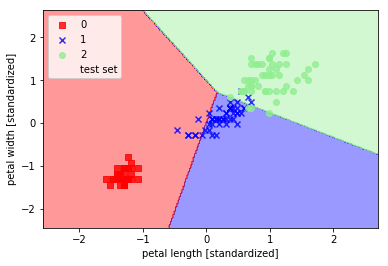

[0 1 2]


In [39]:
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution= 0.02):
    # setup marker generator and colormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha= 0.4, cmap= cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y= X[y == cl, 1],
                   alpha = 0.8, c= cmap(idx),
                   marker= markers[idx], label= cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c= '',
                   alpha= 1.0, linewidth= 1, marker= 'v',
                   s= 20, label= 'test set')
    
iris = datasets.load_iris()
X = iris.data[:,[2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ppn = Perceptron(n_iter= 40, eta0= 0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
from sklearn.metrics import accuracy_score
print ('Accuracy: %.2f'% accuracy_score(y_test, y_pred))
print ('Misclassified samples: %d' % (y_test !=y_pred).sum())

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X= X_combined_std, y = y_combined, classifier= ppn,
                     test_idx= range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc= 'upper left')
plt.show()

## Modeling class probabilities via logistic regression
* **logitic regression:**more powerful algorithm for linear and binary classification problems.Note that,in spite of its name,logistic regression is a model for classification,not regression.
## Logistic regression intuition and conditional probabilities
Logistic regression is a classification model that is very easy to implement but performs very well on linearly separable classes.To explain the idea behind logistic regression as a probabilistic model,let's first introduce the **odds ratio**,which is the odds in favor of a particular event. The odds ratio can be written as $\frac{p}{(1-P)}$,where $p$ stands for the probability of the positive event.The term *positive event* does not necessarily mean *good*,but refers to the event that we want to predict,for example, the probability that a patient has a certain disease;we can think of the positive event as class label $y=1$.We can then further define the **logit** function,which is simply the logarithm of the odds ratio(log-odds):$$ logit(p)=log\frac{p}{(1-p)}$$
The logit function takes input values in the range 0 to 1 and transforms them to values over the entire real number range,which we can use to express a linear relationship between feature values and the log-odds:
$$logit(p(y=1|x))= w_0x_0+w_1x_1+\cdots +w_mx_m=\sum_{i=0}^n w_mx_m = {\bf{w}}^T x$$
here, $p(y=1|x)$ is the conditional probability that a particular smaple belongs to class 1 given its features $x$.

    Sigmoid function:$$\phi(z) = \frac{1}{1+e^{-z}}$$

## Logistic regression model derivation
To explain how we can derive the cost function for logistic regression,let' first define the likelihood $L$ that we want to maximize when we build a logistic regression model,assuming that the individual samples in our dataset are independent of one another.The formula is as follows:
$$ L({\bf{w}})=P({\bf{y|x;w}})=\prod_{i=1}^n P(y^{(i)}|x^{(i)};{\bf{w}})=(\phi(z^{(i)}))^{y^{(i)}} (1-\phi(z^{(i)}))^{1-y^{(i)}}$$
In practice,it is easier to maximize the(natural)log of this equation,which is called the log-lilelihood function:
$$l({\bf {w}})=\log L({\bf w})=\sum_{i=1}^n y^{(i)}\log(\phi(z^{(i)})) + (1-y^{(i)})\log(1-\phi(z^{(i)}))$$
we can convert the above formula to the the follow equation $J({\bf w})$ and use an optimization algorithm to obtain it's maximum value.
$$J({\bf {w}})=-\sum_{i=1}^n y^{(i)}\log(\phi(z^{(i)})) - (1-y^{(i)})\log(1-\phi(z^{(i)}))$$
Looking at the preceding equation,we can see that the first term becomes zero if $y=0$,and the second term becomes zero if $y=1$,respectively:
$$ J(\phi(z),y;{\bf w})= \begin{cases} -\log(\phi(z)), & \text{if $\; y=1$} \\ -\log(1-\phi(z)). & \text{if $\; y=0$} \end{cases}$$
In the figure below,we can see that if the prediction is wrong, the cost goes towards infinity.The moral is that we penalize wrong predictions with an increasingly larger cost.

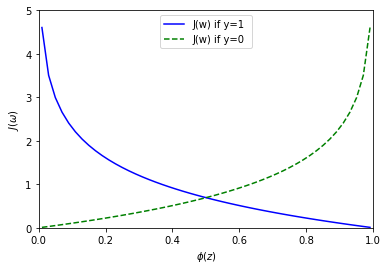

In [20]:
import matplotlib.pyplot as plt
import numpy as np
# relationshipe of J(w) and \phi(z)
phi_z = np.arange(0.01,1.0,0.02)
J_y1 = -np.log(phi_z)
J_y0 = -np.log(1-phi_z)
plt.plot(phi_z, J_y1,'b',label= ('J(w) if y=1 '))
plt.plot(phi_z, J_y0,'g--',label=('J(w) if y=0'))
plt.xlabel('$\phi (z)$')
plt.ylabel('$J(\omega)$')
plt.axis([0.0, 1.0, 0, 5])
plt.legend()
plt.show()

Accuracy: 0.91
Misclassified samples: 4
Accuracy: 0.98
Predict probability of class label: 
 [[0.000 0.063 0.937]
 [0.001 0.999 0.000]
 [0.817 0.183 0.000]]


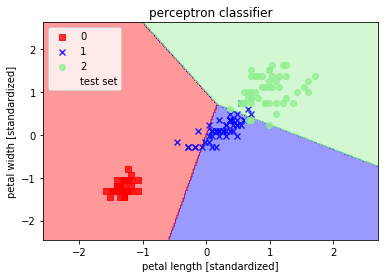

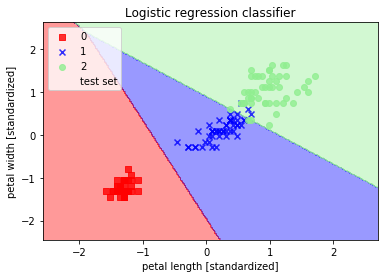

In [39]:
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution= 0.02):
    # setup marker generator and colormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha= 0.4, cmap= cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y= X[y == cl, 1],
                   alpha = 0.8, c= cmap(idx),
                   marker= markers[idx], label= cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c= '',
                   alpha= 1.0, linewidth= 1, marker= 'v',
                   s= 20, label= 'test set')
    
iris = datasets.load_iris()
X = iris.data[:,[2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
# perceptron classification
ppn = Perceptron(n_iter= 40, eta0= 0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
from sklearn.metrics import accuracy_score
print ('Accuracy: %.2f'% accuracy_score(y_test, y_pred))
print ('Misclassified samples: %d' % (y_test !=y_pred).sum())

#logistic regression classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C= 1000.0, random_state= 0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Accuracy: %.2f' % ((y_test == y_pred).sum()/len(y_test)))
# show the predicted probabilities of test samples.
#np.set_printoptions(suppress = True)
np.set_printoptions(formatter= {'float': '{:0.3f}'.format})
print('Predict probability of class label:','\n' ,lr.predict_proba(X_test_std[0:3,:]))


X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plt.figure(1)
plot_decision_regions(X= X_combined_std, y = y_combined, classifier= ppn,
                     test_idx= range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc= 'upper left')
plt.title("perceptron classifier")
plt.figure(2)
plot_decision_regions(X= X_combined_std, y = y_combined, classifier= lr,
                     test_idx= range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc= 'upper left')
plt.title('Logistic regression classifier')
plt.show()

## Tacking overfitting via regularization
Overfitting is common problem in machine learning,where a model performs well on training data but does not generalize well to unseen data(test data).If a model suffers from **overfitting**,we also say that the model has a **high variance**,which can be caused by having too many parameters that lead to a model that is too complex given the underlying data.Similarly,our model can also suffer from **underfitting**(high bias),which means that our model is not complex enough to capture the pattern in the training data well and therefore also suffers from low performance on unseen data.
![performance measurement](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRLU0Zr4Idx7r8a7LBQ1E6niumDtbx8QA6WXemooUckXbRkR9yr3FPeWWWs)
**Note:**

Variance measures the consistency(or varibaility) of the model prediction for a paticular sample instance if we would retrain the model mulitple times,for example,on different subsets of the training dataset.We can say that the model is sensitive to the randomness in the training data.In contrast,bias measures how far off the predictions are from the correct values in general if we rebuild the model multiple times on different trainning datasets;bias is the measure of the systematic error that is not due to randomness.